In [1]:
from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline
import sys
sys.path.insert(0, '../Common/')

import matplotlib.pyplot as plt
import numpy as np
from AISDataManager import AISDataManager
import Constants as c
import pandas as pd

import os
import matplotlib.animation as animation
from IPython.display import HTML

#config parser
import configparser

#MyConfig.INI stores all the run time constants
config = configparser.ConfigParser()
config.read('../MyConfig.INI')

from joblib import Parallel, delayed
import multiprocessing

#make object of AIS data manager
aISDM = AISDataManager()

In [3]:
# lonMin = (float)(config['REGEION']['LON_MIN'])
# lonMax = (float)(config['REGEION']['LON_MAX'])

# latMin = (float)(config['REGEION']['LAT_MIN'])
# latMax = (float)(config['REGEION']['LAT_MAX'])

lonMin = (float)(-120.0)
lonMax = (float)(-119.0)

latMin = (float)(33.5)
latMax = (float)(34.5)
print(lonMin,latMin)
print(lonMax,latMax)

increStep = (float)(0.05)
incrRes = (int)(2)

-120.0 33.5
-119.0 34.5


In [4]:
xGrid = np.arange(lonMin,lonMax,increStep)
xGrid = np.around(xGrid,incrRes)
yGrid = np.arange(latMin,latMax,increStep)
yGrid = np.around(yGrid,incrRes)

In [6]:
# portList = [507, 508, 537, 538, 686, 706, 742, 743, 767, 768, 796, 797, 798, 800, 801, 827, 828, 829, 855, 856, 885, 937, 967, 994, 1020, 1023]

In [7]:
# # heatMapDirectory = "../Data/AIS_0117_0317_31_M120_345_M117/HourlyHM/"
# heatMapDirectory = "../Data/AIS_SB/HourlyHM/"

# # startNum = (int)(config['HOURLY_HEATMAP']['START_NUM'])
# # endNum = (int)(config['HOURLY_HEATMAP']['END_NUM'])
# startNum = (int)(0)
# endNum = (int)(8760)

# #maximum value of heat map
# maxHMValue = 0

# for i in range(startNum,endNum):
#     heatMapFile = heatMapDirectory + str(i) + '.npy'
#     heatMapVal = np.load(heatMapFile)
# #     for jj in portList:
# #         heatMapVal[jj] = 0
#     currentMaxVal = np.max(heatMapVal)
#     print(currentMaxVal)
#     if(currentMaxVal > maxHMValue):
#         maxHMValue = currentMaxVal
# print(maxHMValue)

In [8]:
maxHMValue = 10

In [ ]:
# m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=latMin, urcrnrlat=latMax,
#             llcrnrlon=lonMin, urcrnrlon=lonMax, )

# m.shadedrelief()

# heatMapFile = heatMapDirectory + str(0) + '.npy'
# heatMapVal = np.load(heatMapFile)

# #reshape into image file
# heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
# # heatMapImage = np.flip(heatMapImage,axis=0)
# m.imshow(heatMapImage,cmap=plt.get_cmap('hot'),vmin=0,vmax = 10,alpha=0.8)

In [ ]:
# heatMapDirectory = "../Data/AIS_0117_0317_31_M120_345_M117/HourlyHM/"
# heatMapImgDir = "../Data/AIS_0117_0317_31_M120_345_M117/HourlyHMImg/"

# fig, ax = plt.subplots()
# for i in range(startNum,endNum):
#     heatMapFile = heatMapDirectory + str(i) + '.npy'
#     heatMapVal = np.load(heatMapFile)
    
#     #reshape into image file
#     heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
    
#     #flip the axis
#     heatMapImage = np.flip(heatMapImage,axis=0)
    
#     #plot the image
#     ax.cla()
#     ax.imshow(heatMapImage,cmap=plt.get_cmap('hot'),vmin=0,vmax = maxHMValue)
#     heatMapImageFile = heatMapImgDir + str(i) + '.png'
#     plt.savefig(heatMapImageFile)

In [ ]:
# heatMapDirectory = "../Data/AIS_0117_0317_31_M120_345_M117/HourlyHM/"
# heatMapImgDir = "../Data/AIS_0117_0317_31_M120_345_M117/HourlyHMBMImg/"

# # fig, ax = plt.subplots()
# for i in range(startNum,endNum):
    
#     m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=latMin, urcrnrlat=latMax,
#             llcrnrlon=lonMin, urcrnrlon=lonMax, )

#     m.shadedrelief()
    
#     heatMapFile = heatMapDirectory + str(i) + '.npy'
#     print(heatMapFile)
#     heatMapVal = np.load(heatMapFile)
    
#     #reshape into image file
#     heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
    
#     m.imshow(heatMapImage,cmap=plt.get_cmap('hot'),vmin=0,vmax = maxHMValue,alpha=0.8)
#     heatMapImageFile = heatMapImgDir + str(i) + '.png'
#     plt.savefig(heatMapImageFile)

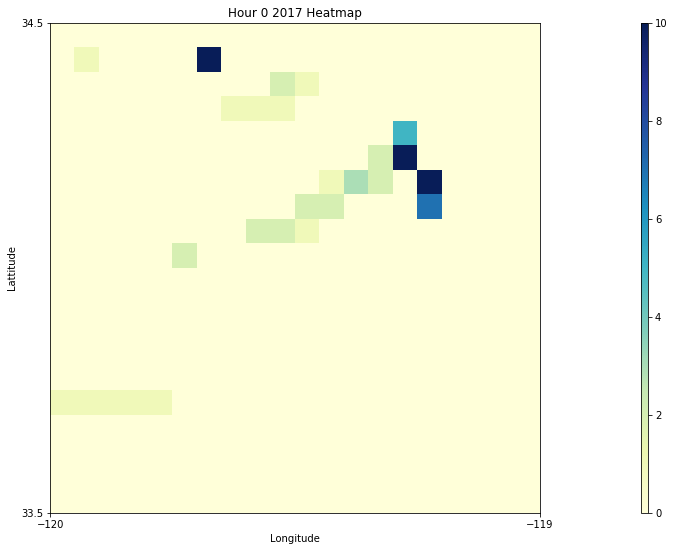

In [11]:
heatMapDirectory = "../Data/AIS_SB/HourlyHM/"

useAspect = 0
aspectRatio = 16.0/9.0
figWidth = 10
figHeight = 8.5

if useAspect == 1:
    figHeight = figWidth/aspectRatio

fig = plt.figure(figsize=(figWidth,figHeight))
ax1 = fig.add_axes([0.01, 0.10, 0.94, 0.8])
ax2 = fig.add_axes([0.96, 0.10, 0.01, 0.8])

def animate(i):
    
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    #reshape into image file
    heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
    
    #flip the axis
    heatMapImage = np.flip(heatMapImage,axis=0)

    titleStr = 'Hour ' + str(i) +' 2017 Heatmap'

    ax1.cla()
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Lattitude')
    ax1.set_title(titleStr)
    ax1.set_xticks([lonMin,lonMax])
    ax1.set_yticks([latMin,latMax])
    iMShowHandler = ax1.imshow(heatMapImage,cmap=plt.get_cmap('YlGnBu') \
                               ,vmin = 0, vmax = 10\
                               ,extent=[lonMin,lonMax,latMin,latMax])
    ax2.cla()
    fig.colorbar(iMShowHandler,ax2)
    
anim = animation.FuncAnimation(fig, animate,frames=200, interval=500)

In [12]:
HTML(anim.to_html5_video())

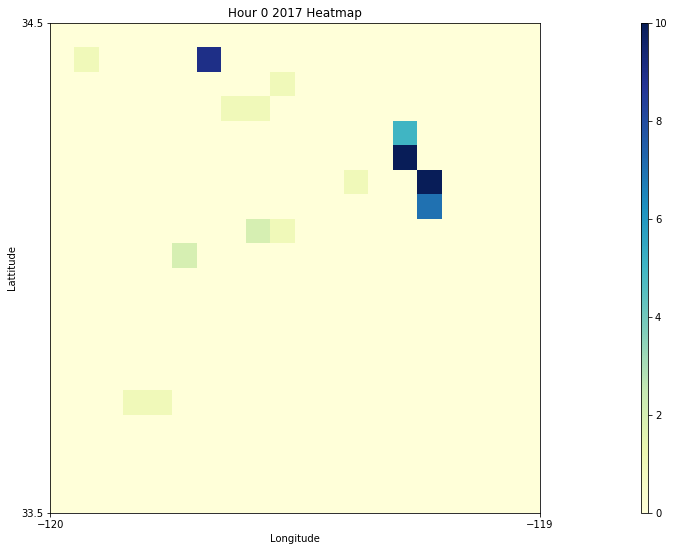

In [13]:
heatMapDirectory = "../Data/AIS_SB/TenlyHM/"

useAspect = 0
aspectRatio = 16.0/9.0
figWidth = 10
figHeight = 8.5

if useAspect == 1:
    figHeight = figWidth/aspectRatio

fig = plt.figure(figsize=(figWidth,figHeight))
ax1 = fig.add_axes([0.01, 0.10, 0.94, 0.8])
ax2 = fig.add_axes([0.96, 0.10, 0.01, 0.8])

def animate(i):
    
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    #reshape into image file
    heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
    
    #flip the axis
    heatMapImage = np.flip(heatMapImage,axis=0)

    titleStr = 'Hour ' + str(i) +' 2017 Heatmap'

    ax1.cla()
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Lattitude')
    ax1.set_title(titleStr)
    ax1.set_xticks([lonMin,lonMax])
    ax1.set_yticks([latMin,latMax])
    iMShowHandler = ax1.imshow(heatMapImage,cmap=plt.get_cmap('YlGnBu') \
                               ,vmin = 0, vmax = 10\
                               ,extent=[lonMin,lonMax,latMin,latMax])
    ax2.cla()
    fig.colorbar(iMShowHandler,ax2)
    
anim = animation.FuncAnimation(fig, animate,frames=200, interval=500)

In [14]:
HTML(anim.to_html5_video())

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
anim.save('HourlyHM.mp4', writer=writer)

In [ ]:
heatMapDirectory = "../Data/AIS_0117_0317_30_M124_35_M118/HourlyIntvlHM/"

# startNum = (int)(config['HOURLY_HEATMAP']['START_NUM'])
# endNum = (int)(config['HOURLY_HEATMAP']['END_NUM'])
startNum = 0
endNum = 24

#maximum value of heat map
maxHMValue = 0

for i in range(startNum,endNum):
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    for jj in portList:
        heatMapVal[jj] = 0
    currentMaxVal = np.max(heatMapVal)
    if(currentMaxVal > maxHMValue):
        maxHMValue = currentMaxVal
print(maxHMValue)

In [ ]:
maxHMValue = 250

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
# First set up the figure, the axis,
# and the plot element we want to animate
heatMapDirectory = "../Data/AIS_0117_0317_31_M120_345_M117/HourlyIntvlHM/"

fig, ax = plt.subplots()

def animate(i):
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    
    #reshape into image file
    heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
    
    #flip the axis
    heatMapImage = np.flip(heatMapImage,axis=0)
    
    ax.cla()
    ax.imshow(heatMapImage,cmap=plt.get_cmap('hot'),vmin=0,vmax = maxHMValue)
    titleStr = "%02d:00:00-%02d:00:00"%(i,i+1)
#     ax.set_title(str(i))
    ax.set_title(titleStr)
    
anim = animation.FuncAnimation(fig, animate,frames=24, interval=500)
anim.save('Hourly_Interval.mp4', writer=writer)
HTML(anim.to_html5_video())

In [ ]:
heatMapDirectory = "../Data/AIS_0117_0317_31_M120_345_M117/DailyIntvlHM/"

# startNum = (int)(config['HOURLY_HEATMAP']['START_NUM'])
# endNum = (int)(config['HOURLY_HEATMAP']['END_NUM'])
startNum = 0
endNum = 7

#maximum value of heat map
maxHMValue = 0

for i in range(startNum,endNum):
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    
    for jj in portList:
        heatMapVal[jj] = 0
    
    currentMaxVal = np.max(heatMapVal)
    if(currentMaxVal > maxHMValue):
        maxHMValue = currentMaxVal
print(maxHMValue)

In [ ]:
maxHMValue = 250

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
# First set up the figure, the axis,
# and the plot element we want to animate
heatMapDirectory = "../Data/AIS_0117_0317_31_M120_345_M117/DailyIntvlHM/"

fig, ax = plt.subplots()

weekDays = {0:'Monday'\
            ,1:'Tuesday'\
            ,2:'Wednesday'\
            ,3:'Thursday'\
            ,4:'Friday'\
            ,5:'Saturday'\
            ,6:'Sunday'\
            }

def animate(i):
    heatMapFile = heatMapDirectory + str(i) + '.npy'
    heatMapVal = np.load(heatMapFile)
    
    #reshape into image file
    heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
    
    #flip the axis
    heatMapImage = np.flip(heatMapImage,axis=0)
    
    ax.cla()
    ax.imshow(heatMapImage,cmap=plt.get_cmap('hot'),vmin=0,vmax = maxHMValue)
    
    titleStr = weekDays[i]
    
    ax.set_title(titleStr)
    
anim = animation.FuncAnimation(fig, animate,frames=7, interval=400)
anim.save('Daily_Interval.mp4', writer=writer)
HTML(anim.to_html5_video())